In [17]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

#import the stored values from other notebooks
%store -r co_clean_df
%store -r no2_clean_df
%store -r PM25_df_clean_df
%store -r day_motor
%store -r co_monthly_mean
%store -r no2_monthly_mean
%store -r PM25_df_monthly_mean


#merge the daily co2 & travel data to only include data where both are recorded on the same day
daily_co=pd.merge(co_clean_df,day_motor,how="inner")
daily_no2=pd.merge(no2_clean_df,day_motor,how="inner")
daily_PM25=pd.merge(PM25_df_clean_df,day_motor,how="inner")

#print one to see the result
daily_co.head()

,Date,Daily Max 8-hour CO Concentration,UNITS,DAILY_AQI_VALUE,Site Name,PERCENT_COMPLETE,POLLUTANT,SITE_LATITUDE,SITE_LONGITUDE,ABBREVIATION,MONTH,DAY,YEAR,SPEED,BUS COUNT,NUM COUNT
0,2018-03-12,0.4,ppm,5,NORTHBROOK WATER PLANT,100.0,Carbon monoxide,42.139996,-87.799227,CO,3,12,2018,16.80,83.0,1229.0
1,2018-03-13,0.4,ppm,5,NORTHBROOK WATER PLANT,100.0,Carbon monoxide,42.139996,-87.799227,CO,3,13,2018,16.93,85.0,1277.0
2,2018-03-14,0.6,ppm,7,NORTHBROOK WATER PLANT,100.0,Carbon monoxide,42.139996,-87.799227,CO,3,14,2018,16.49,87.0,1291.0
3,2018-03-15,0.6,ppm,7,NORTHBROOK WATER PLANT,100.0,Carbon monoxide,42.139996,-87.799227,CO,3,15,2018,16.97,86.0,1281.0
4,2018-03-16,0.2,ppm,2,NORTHBROOK WATER PLANT,100.0,Carbon monoxide,42.139996,-87.799227,CO,3,16,2018,15.86,89.0,1301.0


### Plotting the daily pollutant relationship to the transportation variables

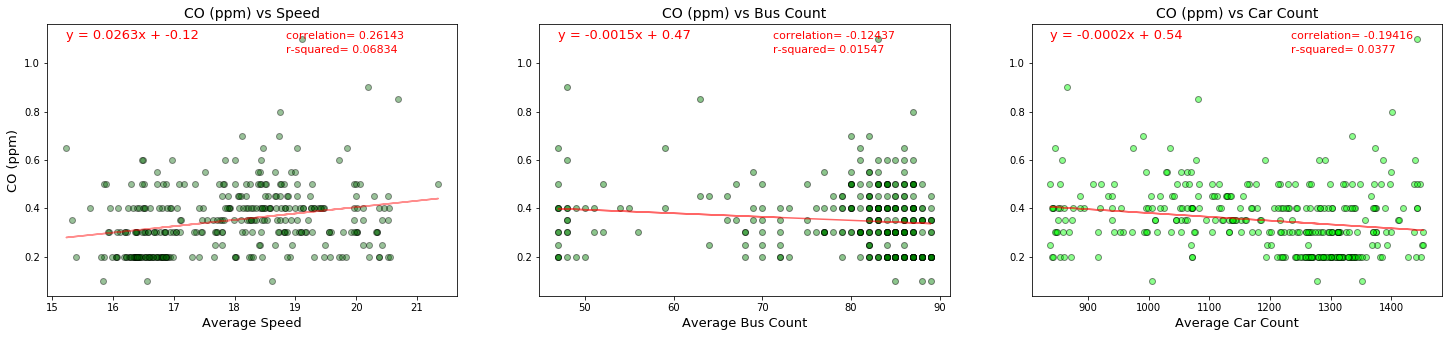

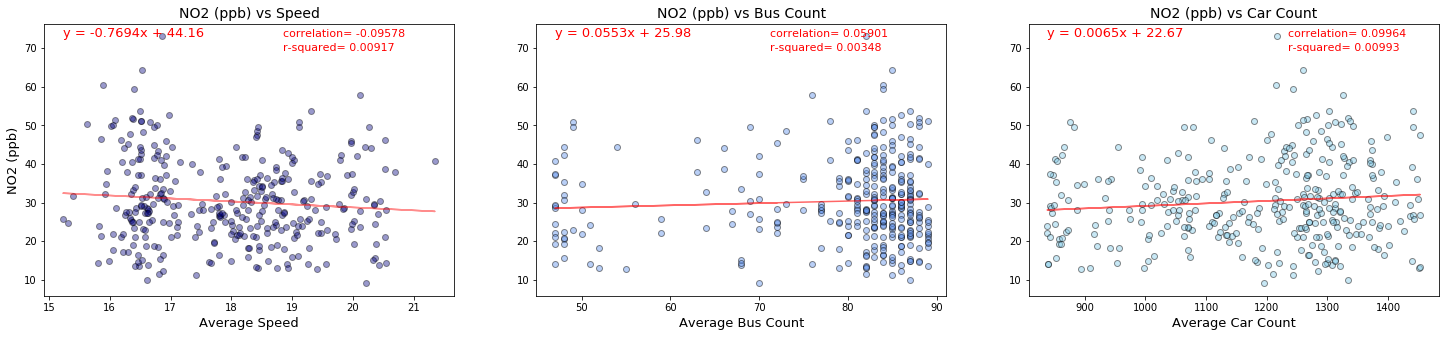

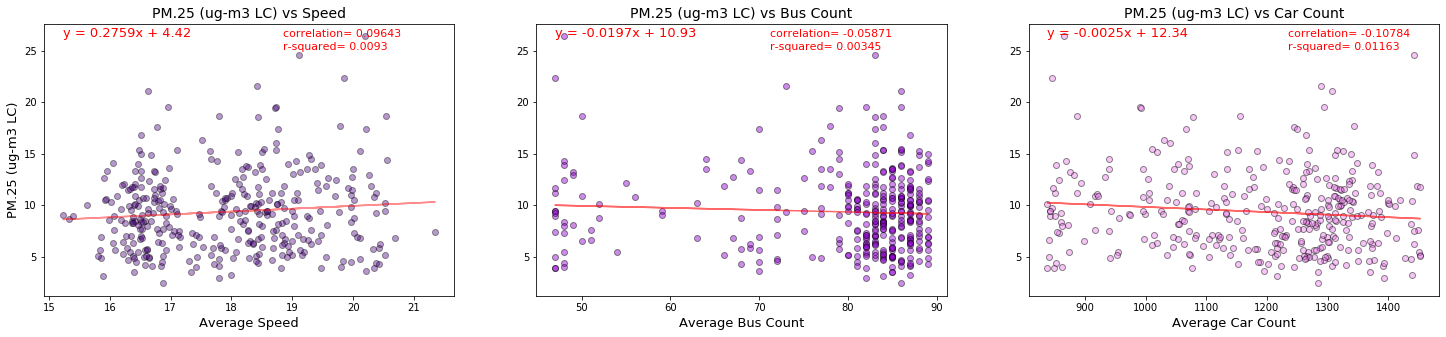

In [19]:
#create a list that will hold x values
x_day=[day_motor["SPEED"],day_motor["BUS COUNT"],day_motor["NUM COUNT"]]

x=[smonthly_avg,bmonthly_avg,nmonthly_avg]

x_names=["Speed","Bus Count","Car Count"]

#create a list that will hold y values
y_day=[daily_co,daily_no2,daily_PM25]

y_names=["CO (ppm)","NO2 (ppb)","PM.25 (ug-m3 LC)"]

y_list=[co_monthly_mean,no2_monthly_mean,PM25_df_monthly_mean]

colors=pd.DataFrame({"CO (ppm)":["darkgreen",
                   "green",
                   "lime"],
        "NO2 (ppb)":["navy",
                    "cornflowerblue",
                    "skyblue"],
        "PM.25 (ug-m3 LC)":["indigo",
                    "darkviolet",
                    "violet"]
    })

#monthlylist

counter=0

#begin loop through y values to make sure all plots for one pollutant are on one row
for y in y_list:

    day_x=y_day[counter].groupby("Date")
    speed=day_x["SPEED"].mean()
    bus=day_x["BUS COUNT"].mean()
    num=day_x["NUM COUNT"].mean()
    
    day_y=y_day[counter].iloc[:,0:2].groupby("Date").mean().iloc[:,0]
    
    #plot the figure
    fig, [ax1, ax2, ax3] = plt.subplots(nrows=1,ncols=3,figsize=(25,5))  
    
    #select the first x series as our x list 
    x_m=speed
    
    #find the correlation between the 2
    correlation = st.pearsonr(x_m,day_y)   
    
    #find the line regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_m,day_y)
    regress_values = x_m * slope + intercept
    r_squared=round(rvalue**2,5)
    
    #create a variable for the line equation
    line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))

    #create and format first scatter
    ax1.scatter(x_m,day_y,
                facecolors=colors[y_names[counter]][0],
                edgecolors="black",alpha=.4)
    
    ax1.set_title(f"{y_names[counter]} vs {x_names[0]}",fontsize=14)
    ax1.plot(x_m,regress_values,"r-",alpha=.45)
    ax1.set_xlabel(f"Average {x_names[0]}",fontsize=13)
    ax1.set_ylabel(f"{y_names[counter]}",fontsize=13)
    #ax3.grid()
    ax1.annotate(line_eq,(min(x_m),max(day_y)),fontsize=13,color="red", alpha=1)
    ax1.annotate(f"correlation= {round(correlation[0],5)}",(max(x_m)-2.5,max(day_y)),fontsize=11,color="red", alpha=1)
    ax1.annotate(f"r-squared= {r_squared}",(max(x_m)-2.5,max(day_y)*.95),fontsize=11,color="red", alpha=1)

    #select the second x series as our x list 
    x_m=bus
    
    #find the correlation between the 2
    correlation = st.pearsonr(x_m,day_y)
    
    #find the line regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_m,day_y)
    regress_values = x_m * slope + intercept
    r_squared=round(rvalue**2,5)
    
    #create a variable for the line equation
    line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))   
      
    ax2.scatter(x_m,day_y,
                facecolors=colors[y_names[counter]][1],
                edgecolors="black",alpha=.45)
    
    ax2.set_title(f"{y_names[counter]} vs {x_names[1]}",fontsize=14)
    ax2.plot(x_m,regress_values,"r-",alpha=.6)
    ax2.set_xlabel(f"Average {x_names[1]}",fontsize=13)
    #ax2.set_ylabel(f"{y_names[counter]}",fontsize=13)
    #ax3.grid()
    ax2.annotate(line_eq,(min(x_m),max(day_y)),fontsize=13,color="red", alpha=1)
    ax2.annotate(f"correlation= {round(correlation[0],5)}",(max(x_m)*.80,max(day_y)),fontsize=11,color="red", alpha=1)
    ax2.annotate(f"r-squared= {r_squared}",(max(x_m)*.80,max(day_y)*.95),fontsize=11,color="red", alpha=1)
    #print(f"The correlation  of {y_names[counter]} and {x_names[2]} is {correlation[0]}")
    #print(f"The r-squared value is {r_squared}")

     #select the third x series as our x list 
    x_m=num
    
    #find the s_hem correlation
    correlation = st.pearsonr(x_m,day_y)
    
    #find the line regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_m,day_y)
    regress_values = x_m * slope + intercept
    r_squared=round(rvalue**2,5)
    
    #create a variable for the line equation
    line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
    
    ax3.scatter(x_m,day_y,
                facecolors=colors[y_names[counter]][2],
                edgecolors="black",alpha=.45)
    
    ax3.set_title(f"{y_names[counter]} vs {x_names[2]}",fontsize=14)
    ax3.plot(x_m,regress_values,"r-",alpha=.6)
    ax3.set_xlabel(f"Average {x_names[2]}",fontsize=13)
    #ax3.set_ylabel(f"{y_names[counter]}",fontsize=13)
    #ax3.grid()
    ax3.annotate(line_eq,(min(x_m),max(day_y)),fontsize=13,color="red", alpha=1)
    ax3.annotate(f"correlation= {round(correlation[0],5)}",(max(x_m)*.85,max(day_y)),fontsize=11,color="red", alpha=1)
    ax3.annotate(f"r-squared= {r_squared}",(max(x_m)*.85,max(day_y)*.95),fontsize=11,color="red", alpha=1)
    #print(f"The correlation  of {y_names[counter]} and {x_names[2]} is {correlation[0]}")
    #print(f"The r-squared value is {r_squared}")
    
    plt.savefig(f"plots/{y_names[counter]}vMobile_Plot.png")
    counter+=1
    
    plt.show()